### Graph of probe measures

In [112]:
import seaborn as sns
import pandas as pd
import json
import matplotlib.pyplot as plt

run = "base_strongaug_ema_inf_sq"
model_df_filename = f"/home/heather/GitHub/aldi0107/outputs/urchininf/{run}/probe_data_model_df.json"
outputs_filename = f"/home/heather/GitHub/aldi0107/outputs/urchininf/{run}/probe_data.json"
df = pd.read_json(model_df_filename)  # or however you load your DataFrame

with open(outputs_filename, 'r') as file:
    data = json.load(file)
df['model_no'] = [i for i in range(len(df.index))]


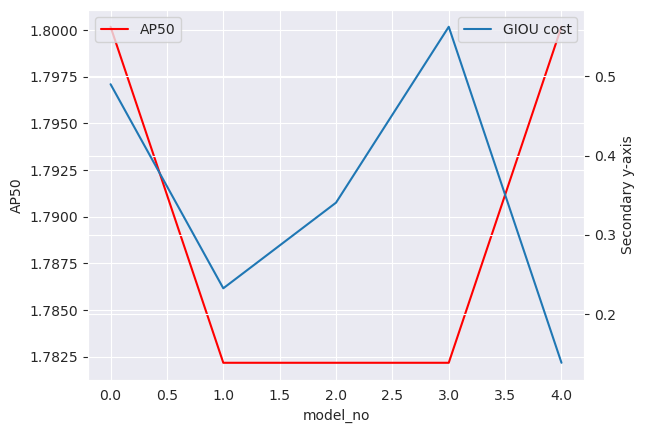

In [113]:
# Create the lineplot with dual y-axes
fig, ax1 = plt.subplots()

# Plot the first line on the primary y-axis
#sns.lineplot(data=df, x='x', y='y1', ax=ax1, label='y1')
sns.lineplot(data=df, x='model_no', y='eval', ax=ax1, label='AP50', color='r')
ax1.set_ylabel('AP50')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
#sns.lineplot(data=df, x='x', y='y2', ax=ax2, color='r', label='y2')

#sns.lineplot(data=df, x='model_no', y='source_eval', ax=ax2, label='Source AP50')
sns.lineplot(data=df, x='model_no', y='giou_cost_1', ax=ax2, label='GIOU cost')
#sns.lineplot(data=df, x='model_no', y='same_box_kl_cost_1', ax=ax2, label='KL cost')
#sns.lineplot(data=df, x='model_no', y='same_box_kl_cost_1', ax=ax2, label='KL cost')
#sns.lineplot(data=df, x='model_no', y='bos_iou_cost_1', ax=ax2, label='IOU cost')
#sns.lineplot(data=df, x='model_no', y='same_ice', ax=ax2, label='Same ICE')
#sns.lineplot(data=df, x='model_no', y='diff_ice', ax=ax2, label='Diff ICE')
ax2.set_ylabel('Secondary y-axis')

plt.xticks(rotation=45)

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [114]:
# Melt the DataFrame
cols = [c for c in df.columns if c not in ['model_no', ] and 'rank' not in c]
cols.append('avg_ice_rank_raw')
df_melted = pd.melt(df, id_vars=['model_no'], value_vars=cols, 
                    var_name='category', value_name='value')


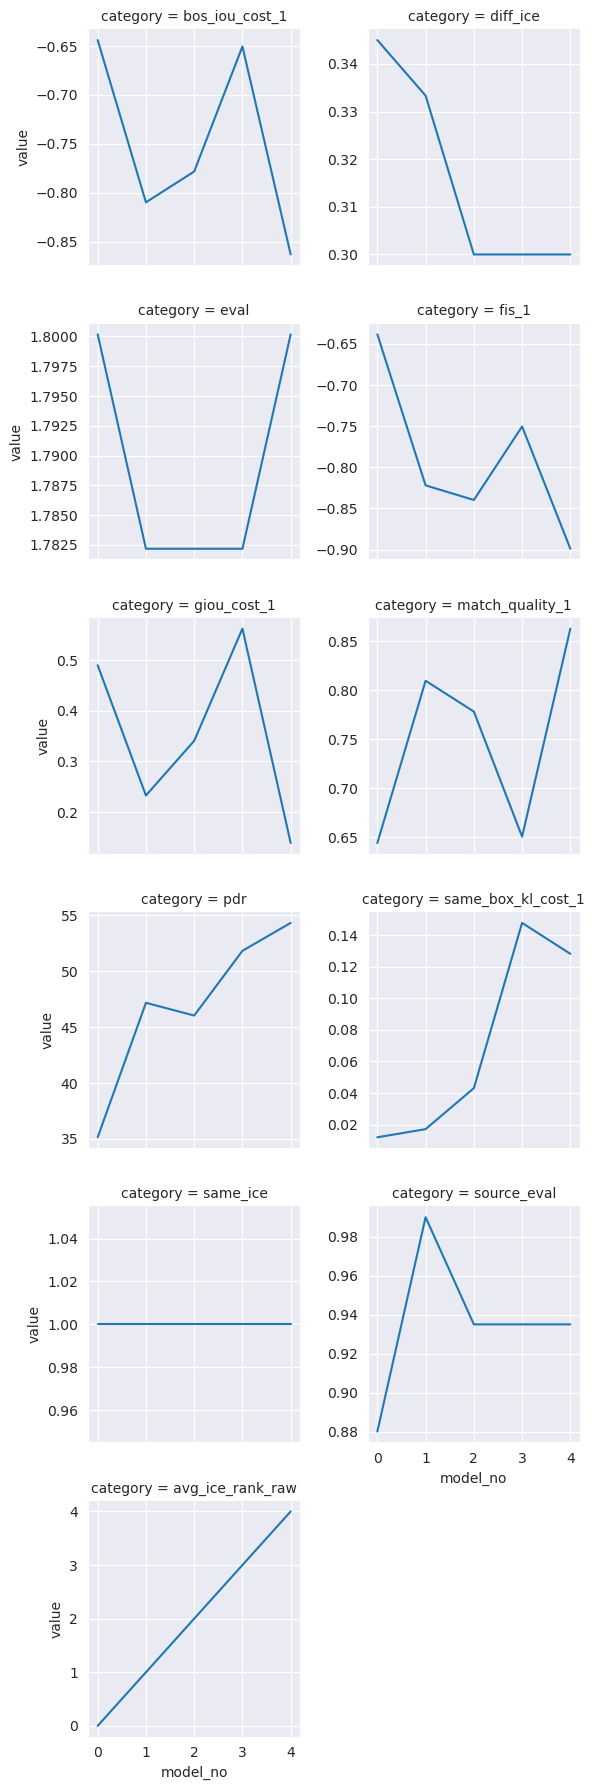

In [115]:
# Create the FacetGrid plot
g = sns.FacetGrid(df_melted, col="category", col_wrap=2, height=3, sharey=False)
g.map(sns.lineplot, "model_no", "value")
plt.show()